In [8]:
!pip install pandas seaborn numpy matplotlib sklearn sympy plotly

In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly
from sympy import *
import matplotlib as mpl
# Change plotly colors scheme
plotly.io.templates.default = 'plotly_dark'

In [3]:
data_string = """0.0	3.93
0.1	7.96
0.2	15.9
0.3	18.8
0.4	18.2
0.5	17.6
0.6	19.0
0.7	22.0
0.8	23.8
0.9	20.3
1.0	9.9
1.1	3.74
1.2	11.3
1.3	17.6
1.4	19.0
1.5	18.0
1.6	18.0
1.7	20.0
1.8	22.8
1.9	23.3
2.0	17.1
2.1	6.2
2.2	5.8
2.3	14.5
2.4	18,8
2.5	19.0
2.6	18.1
2.7	18,8
2.8	21.3
2.9	23.8
3.0	22.1
3.1	13.5
3.2	4.0
3.3	8.9
3.4	17.0
3.5	19.6
3.6	18.8
3.7	18.4
3.8	19.9
3.9	22.6
4.0	24.12
4.1	20.0
4.2	9.3
4.3	4.1
4.4	12.4
4.5	18.6
4.6	19.4
4,7	18.2
4.8	18.1
4.9	20.0
5.0	22.8
5.1	23.1"""
data_string = data_string.replace(',', '.')
dataframe = pd.DataFrame([x.split('\t') for x in data_string.split('\n')], columns=['d', 'I'])
dataframe['d'] = dataframe['d'].astype(float)
dataframe['I'] = dataframe['I'].astype(float)
dataframe

,d,I
0,0.0,3.93
1,0.1,7.96
2,0.2,15.90
3,0.3,18.80
4,0.4,18.20
5,0.5,17.60
6,0.6,19.00
7,0.7,22.00
8,0.8,23.80
9,0.9,20.30


Text(0, 0.5, 'I, ед')

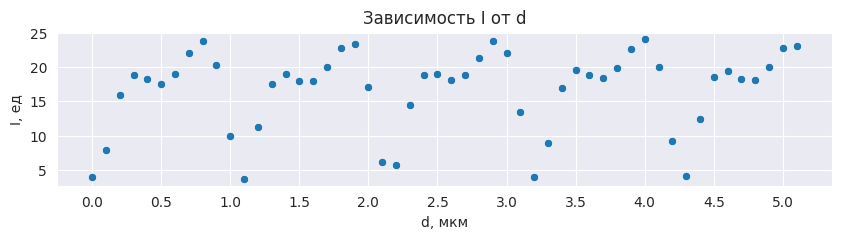

In [7]:
# Increase the size of the plot
plt.figure(figsize=(10, 2))
# Decrease axis step
plt.xticks(np.arange(dataframe['d'].min(), dataframe['d'].max(), 0.5))
# Plot the data (points plot)
sns.scatterplot(data=dataframe, x='d', y='I')
plt.title('Зависимость I от d')
plt.xlabel('d, мкм') # TODO
plt.ylabel('I, ед')

In [23]:
plotly.express.scatter(dataframe, x='d', y='I')

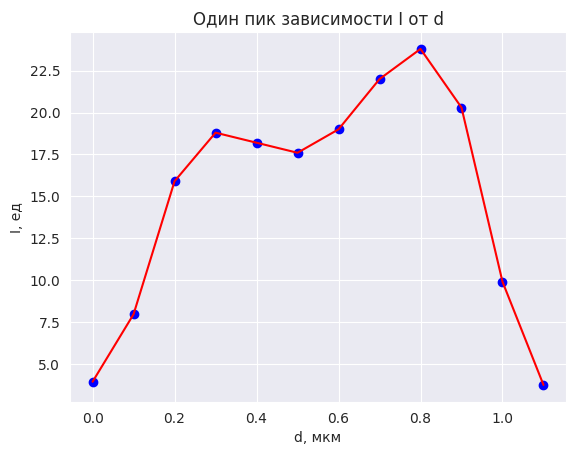

In [13]:
one_pic = dataframe[dataframe['d'] < 1.2]

# Строим scatterplot
plt.scatter(one_pic['d'], one_pic['I'], color='blue')

# Строим plot I от d
plt.plot(one_pic['d'], one_pic['I'], color='red')

# Добавляем заголовок и подписи осей
plt.title('Один пик зависимости I от d')
plt.xlabel('d, мкм') # TODO
plt.ylabel('I, ед')

# Отображаем график
plt.show()

In [28]:
d_maximums = [0.8, 1.9, 2.9, 4.0, 5.1]
wave_lambda = 2 # 2 мм
avg_delta_maximum_d = np.mean(np.diff(d_maximums))
avg_delta_maximum_d

1.0749999999999997

In [29]:
avg_delta_maximum_d * 2 / wave_lambda # Расчет n через расстояние между максимумами

1.0749999999999997

In [14]:
contrast = (dataframe['I'].max() - dataframe['I'].min())
n = symbols('n')
R = ((n-1)/(n+1))**2
solve(contrast -((1 + R)/(1-R)), n) # Расчет n через контраст. Выбираем больший корень

[0.0245486417028817, 40.7354513582971]

### 5. Дифракционная решетка

\begin{tabular}{lrr}
\toprule
 & d & I \\
\midrule
0 & 0.000000 & 3.930000 \\
1 & 0.100000 & 7.960000 \\
2 & 0.200000 & 15.900000 \\
3 & 0.300000 & 18.800000 \\
4 & 0.400000 & 18.200000 \\
5 & 0.500000 & 17.600000 \\
6 & 0.600000 & 19.000000 \\
7 & 0.700000 & 22.000000 \\
8 & 0.800000 & 23.800000 \\
9 & 0.900000 & 20.300000 \\
10 & 1.000000 & 9.900000 \\
11 & 1.100000 & 3.740000 \\
12 & 1.200000 & 11.300000 \\
13 & 1.300000 & 17.600000 \\
14 & 1.400000 & 19.000000 \\
15 & 1.500000 & 18.000000 \\
16 & 1.600000 & 18.000000 \\
17 & 1.700000 & 20.000000 \\
18 & 1.800000 & 22.800000 \\
19 & 1.900000 & 23.300000 \\
20 & 2.000000 & 17.100000 \\
21 & 2.100000 & 6.200000 \\
22 & 2.200000 & 5.800000 \\
23 & 2.300000 & 14.500000 \\
24 & 2.400000 & 18.800000 \\
25 & 2.500000 & 19.000000 \\
26 & 2.600000 & 18.100000 \\
27 & 2.700000 & 18.800000 \\
28 & 2.800000 & 21.300000 \\
29 & 2.900000 & 23.800000 \\
30 & 3.000000 & 22.100000 \\
31 & 3.100000 & 13.500000 \\
32 & 3.200000 & 4.000000 \\
33 & 3.30

In [17]:
|